# Import Library

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.neighbors import KNeighborsClassifier #KNN Neighbors
from sklearn.tree import DecisionTreeClassifier #DecisionTree
from sklearn.ensemble import RandomForestClassifier #RandomForest
from sklearn.svm import SVC #SupportVectorMachine
import xgboost as xgb #Xgboost classifier

from sklearn.model_selection import RandomizedSearchCV #finding best param
from sklearn.model_selection import GridSearchCV #finding best param
from sklearn.model_selection import RepeatedStratifiedKFold #For crossvalidation folds

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

from sklearn.preprocessing import StandardScaler #if needed
from sklearn.pipeline import Pipeline #if needed

In [3]:
!pip install shap
import shap

  Using cached shap-0.41.0-cp38-cp38-win_amd64.whl (435 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4


In [4]:
!pip install pyxlsb

  Using cached pyxlsb-1.0.9-py2.py3-none-any.whl (23 kB)


#Import Datasets

In [5]:
#df_train = pd.read_csv("/content/drive/My Drive/DATA SCIENCE/Project ML & Deployment/TrainTestIVF/train_IVF.csv")
#df_train = pd.read_csv("/content/drive/My Drive/DATA SCIENCE/Project ML & Deployment/TrainTestIVF/train_2010-2014.csv")

In [6]:
df_train = pd.read_csv("F:/DATA SCIENCE/Project ML & Deployment/Modelling/train_2010-2014.csv")

In [7]:
#df_test = pd.read_csv("/content/drive/My Drive/DATA SCIENCE/Project ML & Deployment/TrainTestIVF/test_IVF.csv")
#df_test = pd.read_csv("/content/drive/My Drive/DATA SCIENCE/Project ML & Deployment/TrainTestIVF/test_2010-2014.csv")
df_test = pd.read_csv("F:/DATA SCIENCE/Project ML & Deployment/Modelling/test_2010-2014.csv")

In [8]:
df_train.head(10)

,Patient Age at Treatment,Total Number of Previous IVF cycles,Total Number of Previous DI cycles,Total number of IVF pregnancies,Total number of DI pregnancies,Main Reason for Producing Embroys Storing Eggs,Donated embryo,Patient acting as Surrogate,Type of treatment - IVF or DI,Specific treatment type,...,Eggs Mixed With Donor sperm,Total Embryos Created,Eggs Micro-injected,Total Embryos Thawed,Embryos Transfered,Embryos Transfered from Eggs Micro-injected,Embryos Stored For Use By Patient,Type of Infertility,Cause of Infertility,success or not
0,2,0,0,0,0,0.0,0.0,0.0,1,2.0,...,0,1,0,0,2.0,0.0,0,0,4,0
1,1,0,0,0,0,0.0,0.0,0.0,1,1.0,...,0,2,1,0,2.0,2.0,0,0,3,0
2,1,2,0,0,0,0.0,0.0,0.0,1,1.0,...,0,1,1,0,2.0,2.0,0,0,2,1
3,1,2,0,0,0,0.0,0.0,0.0,1,1.0,...,0,2,1,0,2.0,2.0,1,0,3,0
4,0,0,0,0,0,0.0,0.0,0.0,1,1.0,...,0,2,2,0,2.0,2.0,1,0,3,0
5,1,1,0,0,0,4.0,0.0,0.0,1,2.0,...,0,0,0,0,0.0,0.0,0,0,0,0
6,2,0,0,0,0,0.0,0.0,0.0,1,2.0,...,0,0,0,0,1.0,0.0,0,0,4,0
7,1,2,0,1,0,0.0,0.0,0.0,1,2.0,...,0,1,0,0,2.0,0.0,1,0,5,0
8,0,0,0,0,0,0.0,0.0,0.0,1,1.0,...,0,1,1,0,2.0,2.0,0,0,3,1
9,3,3,0,0,0,0.0,0.0,0.0,1,1.0,...,0,0,0,0,1.0,1.0,0,0,4,0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269687 entries, 0 to 269686
Data columns (total 30 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   Patient Age at Treatment                        269687 non-null  int64  
 1   Total Number of Previous IVF cycles             269687 non-null  int64  
 2   Total Number of Previous DI cycles              269687 non-null  int64  
 3   Total number of IVF pregnancies                 269687 non-null  int64  
 4   Total number of DI pregnancies                  269687 non-null  int64  
 5   Main Reason for Producing Embroys Storing Eggs  269687 non-null  float64
 6   Donated embryo                                  269687 non-null  float64
 7   Patient acting as Surrogate                     269687 non-null  float64
 8   Type of treatment - IVF or DI                   269687 non-null  int64  
 9   Specific treatment type   

In [10]:
df_train.describe()

,Patient Age at Treatment,Total Number of Previous IVF cycles,Total Number of Previous DI cycles,Total number of IVF pregnancies,Total number of DI pregnancies,Main Reason for Producing Embroys Storing Eggs,Donated embryo,Patient acting as Surrogate,Type of treatment - IVF or DI,Specific treatment type,...,Eggs Mixed With Donor sperm,Total Embryos Created,Eggs Micro-injected,Total Embryos Thawed,Embryos Transfered,Embryos Transfered from Eggs Micro-injected,Embryos Stored For Use By Patient,Type of Infertility,Cause of Infertility,success or not
count,269687.000000,269687.000000,269687.000000,269687.000000,269687.000000,269687.000000,269687.000000,269687.000000,269687.000000,269687.000000,...,269687.000000,269687.000000,269687.000000,269687.000000,269687.000000,269687.000000,269687.000000,269687.000000,269687.000000,269687.000000
mean,1.230630,1.178830,0.184080,0.172151,0.013920,0.099608,0.005959,0.002970,1.065242,1.835876,...,0.038953,0.989707,0.489760,0.250060,1.421259,0.633319,0.180635,0.057370,2.400420,0.332044
std,1.401383,1.505643,0.811785,0.432869,0.136512,0.509621,0.076963,0.054418,0.246953,0.883719,...,0.193482,0.995342,0.705002,0.776769,0.769703,0.878122,0.407902,0.290203,1.504835,0.470948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,0.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,4.000000,1.000000
max,6.000000,6.000000,6.000000,5.000000,5.000000,4.000000,1.000000,1.000000,2.000000,4.000000,...,1.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,6.000000,6.000000,1.000000


In [11]:
df_test.head(10)

,Patient Age at Treatment,Total Number of Previous IVF cycles,Total Number of Previous DI cycles,Total number of IVF pregnancies,Total number of DI pregnancies,Main Reason for Producing Embroys Storing Eggs,Donated embryo,Patient acting as Surrogate,Type of treatment - IVF or DI,Specific treatment type,...,Eggs Mixed With Donor sperm,Total Embryos Created,Eggs Micro-injected,Total Embryos Thawed,Embryos Transfered,Embryos Transfered from Eggs Micro-injected,Embryos Stored For Use By Patient,Type of Infertility,Cause of Infertility,success or not
0,0,0,0,0,0,0.0,0.0,0.0,1,1.0,...,0,3,2,0,0.0,0.0,2,0,3,0
1,1,0,0,0,0,0.0,0.0,0.0,1,1.0,...,0,2,1,0,2.0,2.0,0,0,3,1
2,0,0,0,0,0,0.0,0.0,0.0,1,2.0,...,0,0,0,0,0.0,0.0,0,0,1,0
3,4,3,0,1,0,0.0,0.0,0.0,1,1.0,...,0,1,1,0,2.0,2.0,0,0,4,1
4,1,6,0,1,0,0.0,0.0,0.0,1,3.0,...,0,0,0,0,1.0,0.0,0,0,3,0
5,0,1,0,0,0,0.0,0.0,0.0,1,1.0,...,0,3,3,0,2.0,2.0,1,0,2,1
6,0,2,0,0,0,0.0,0.0,0.0,1,3.0,...,0,0,0,4,2.0,0.0,0,0,2,0
7,1,1,2,0,0,0.0,0.0,0.0,2,4.0,...,0,0,0,0,2.0,0.0,0,0,0,0
8,2,0,0,0,0,0.0,0.0,0.0,1,2.0,...,0,1,0,0,1.0,0.0,0,0,4,0
9,1,1,0,0,0,0.0,0.0,0.0,1,1.0,...,0,2,1,0,2.0,2.0,1,0,4,0


In [12]:
df_test.describe()

,Patient Age at Treatment,Total Number of Previous IVF cycles,Total Number of Previous DI cycles,Total number of IVF pregnancies,Total number of DI pregnancies,Main Reason for Producing Embroys Storing Eggs,Donated embryo,Patient acting as Surrogate,Type of treatment - IVF or DI,Specific treatment type,...,Eggs Mixed With Donor sperm,Total Embryos Created,Eggs Micro-injected,Total Embryos Thawed,Embryos Transfered,Embryos Transfered from Eggs Micro-injected,Embryos Stored For Use By Patient,Type of Infertility,Cause of Infertility,success or not
count,67422.000000,67422.000000,67422.000000,67422.000000,67422.00000,67422.000000,67422.000000,67422.000000,67422.000000,67422.000000,...,67422.000000,67422.000000,67422.000000,67422.000000,67422.000000,67422.000000,67422.000000,67422.000000,67422.000000,67422.000000
mean,1.224511,1.176886,0.173875,0.172866,0.01188,0.099700,0.005414,0.002655,1.063214,1.826570,...,0.037910,0.998784,0.490270,0.248035,1.425870,0.639005,0.182196,0.055531,2.396147,0.329373
std,1.396688,1.500629,0.784888,0.432650,0.12369,0.508509,0.073379,0.051458,0.243349,0.877403,...,0.190981,0.998225,0.702568,0.771859,0.767638,0.880741,0.409103,0.284057,1.502396,0.469989
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,2.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,2.000000,...,0.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,4.000000,1.000000
max,6.000000,6.000000,6.000000,4.000000,5.00000,4.000000,1.000000,1.000000,2.000000,4.000000,...,1.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,6.000000,6.000000,1.000000


Define target features & train features
-------

Define Train features and target features from:
1. Training dataset
2. Testing dataset

In [13]:
#df_sample_train= df_train.sample(n=50000)
#df_sample_test = df_test.sample(n=20000)
#X_train = df_sample_train.drop(['success or not'], axis=1)
#y_train = df_sample_train['success or not']
#X_test = df_sample_test.drop(['success or not'], axis=1)
#y_test = df_sample_test['success or not']

In [14]:
X_train = df_train.drop(['success or not'], axis=1)
y_train = df_train['success or not']
X_test = df_test.drop(['success or not'], axis=1)
y_test = df_test['success or not']

# Validation Data

In [15]:
#df_valid = pd.read_excel('/content/drive/My Drive/DATA SCIENCE/Project ML & Deployment/ar-2015-2016-xlsb.xlsb', engine='pyxlsb')

In [16]:
df_valid = pd.read_excel("F:/DATA SCIENCE/Project ML & Deployment/Modelling/ar-2015-2016-xlsb.xlsb", engine='pyxlsb')

In [17]:
#df_valid_sample=df_valid.sample(n=10000)

In [18]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158519 entries, 0 to 158518
Data columns (total 95 columns):
 #   Column                                                                    Non-Null Count   Dtype  
---  ------                                                                    --------------   -----  
 0   Patient Age at Treatment                                                  158519 non-null  object 
 1   Date patient started trying to become pregnant OR date of last pregnancy  617 non-null     float64
 2   Total Number of Previous cycles, Both IVF and DI                          158519 non-null  object 
 3   Total Number of Previous treatments, Both IVF and DI at clinic            158519 non-null  object 
 4   Total Number of Previous IVF cycles                                       158519 non-null  object 
 5   Total Number of Previous DI cycles                                        158519 non-null  object 
 6   Total number of previous pregnancies, Both IVF and D

# Feature Engineering 

### For Validaton only

In [19]:
def feature_engineering_target (df_selected):

    #For target Value
    df_selected_target = df_selected[['Total number of live births - conceived through IVF or DI','Total number of live births - conceived through IVF','Total number of live births - conceived through DI','Number of Live Births']].copy()
    df_selected_target= pd.concat([df_selected_target,df_selected['Live Birth Occurrence']], axis=1)
    #TREAT Total number of live births - conceived through IVF or DI
    #Transform >=5 to certain number
    df_selected_target['Total number of live births - conceived through IVF or DI'].replace('>=5', 6, inplace=True)
    #Transform data into integer
    df_selected_target['Total number of live births - conceived through IVF or DI']= df_selected_target['Total number of live births - conceived through IVF or DI'].astype(str).astype(float)
    #Transform dataframe to 0 and 1, with 1 is stated as successful live birth, while 0 is no recorded livebirth
    df_selected_target['Total number of live births - conceived through IVF or DI'] = np.where(df_selected_target['Total number of live births - conceived through IVF or DI']==0, 0, 1)
    #No need to convert to int as it is already numeric
    df_selected_target['Total number of live births - conceived through IVF'] = np.where(df_selected_target['Total number of live births - conceived through IVF']==0, 0, 1)
    df_selected_target['Total number of live births - conceived through DI'] = np.where(df_selected_target['Total number of live births - conceived through DI']==0, 0, 1)
    df_selected_target['Number of Live Births'] = np.where(df_selected_target['Number of Live Births']==0, 0, 1)
    #COMBINE ALL COLUMNS, if there is any number 1 in a row, then it will be added as successful birth
    # create a list of our conditions
    conditions = [
    (df_selected_target['Total number of live births - conceived through IVF'] == 1) | 
    (df_selected_target['Total number of live births - conceived through DI'] == 1) | 
    (df_selected_target['Total number of live births - conceived through DI'] == 1) |
    (df_selected_target['Number of Live Births'] == 1) |
    (df_selected_target['Live Birth Occurrence'] == 1)
    ]
    # create a list of the values we want to assign for each condition
    values = [1]
    # create a new column and use np.select to assign values to it using our lists as arguments
    df_selected_target['success or not'] = np.select(conditions, values, default=0)
    #Take only the success or not column
    df_selected_target.drop(['Total number of live births - conceived through IVF or DI', 'Total number of live births - conceived through IVF',
                         'Total number of live births - conceived through DI','Number of Live Births', 'Live Birth Occurrence'], axis=1, inplace= True)


    return df_selected_target

In [20]:
def feature_engineering_features (df_selected):

    #For features value
    cols_feature= ['Cause  of Infertility - Tubal disease',
       'Cause of Infertility -  Partner Sperm Immunological factors',
       'Cause of Infertility -  Partner Sperm Morphology',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Female Factors',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Partner Sperm Concentration',
       'Cause of Infertility - Patient Unexplained',
       'Causes of Infertility - Partner Sperm Motility',
       'Date of Embryo Transfer', 'Donated embryo', 'Early Outcome',
       'Egg Source', 'Eggs Micro-injected', 'Eggs Mixed With Donor sperm',
       'Eggs Mixed With Partner Sperm', 'Eggs Thawed',
       'Elective Single Embryo Transfer',
       'Embryos (from Eggs Micro-injected) Stored For Use By Patient',
       'Embryos Stored For Use By Patient', 'Embryos Transfered',
       'Embryos Transfered from Eggs Micro-injected',
       'Embryos from Eggs Micro-injected', 'Fresh Cycle',
       'Fresh Eggs Collected', 'Fresh Eggs Stored', 'Frozen Cycle',
       'Main Reason for Producing Embroys Storing Eggs',
       'Number of foetal sacs with fetal pulsation',
       'PGD', 'Patient Age at Treatment', 'Patient acting as Surrogate',
       'Specific treatment type', 'Sperm From', 'Stimulation used',
       'Total Eggs Mixed', 'Total Embryos Created', 'Total Embryos Thawed',
       'Total Number of Previous DI cycles',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total number of DI pregnancies', 'Total number of IVF pregnancies',
       'Total number of previous pregnancies, Both IVF and DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Type of treatment - IVF or DI', 'Year of Treatment']
    df_selected_feature = df_selected[[c for c in df_selected.columns if c in cols_feature]]

    #Treat Total number of IVF pregnancies
    TNIVFmap = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5 ,'>=5':6}
    df_selected_feature['Total number of IVF pregnancies'] = df_selected_feature['Total number of IVF pregnancies'].replace(TNIVFmap)

    #TREAT PATIENT AGE AT TREATMENT
    Patmap = {'18 - 34':0,'35-37':1,'38-39':2,'40-42':3,'43-44':4,'45-50':5 ,'999':6}
    #Assume age input 999 is equal to >50
    df_selected_feature['Patient Age at Treatment'] = df_selected_feature['Patient Age at Treatment'].map(Patmap)

    #Treat Total Number of Previous IVF cycles
    TNPICmap = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5 ,'>=5':6}
    df_selected_feature['Total Number of Previous IVF cycles'] =df_selected_feature['Total Number of Previous IVF cycles'].map(TNPICmap)

    #Treat Total Number of Previous DI cycles
    TNPDCmap = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5 ,'>=5':6}
    df_selected_feature['Total Number of Previous DI cycles'] =df_selected_feature['Total Number of Previous DI cycles'].map(TNPDCmap)

    #Treat Main Reason for Producing Embroys Storing Eggs
    #Combine the excessive data for modelling purposes, as the additional data is a combination of main feature
    TMPESmap = {'Treatment Now ':0,'For Donation ':1,'Treatment Now ,For Donation ':2,'For Storing Embryos ':3,'For Storing Eggs ':4,
            'For Donation ,For Storing Embryos ':1,'For Donation ,For Storing Eggs ':1,'Treatment Now ,For Storing Embryos ':0,
           'Treatment Now ,For Donation ,For Storing Embryos ':0,'Treatment Now ,For Storing Eggs ':0,'For Storing Embryos ,For Storing Eggs ':3}
    df_selected_feature['Main Reason for Producing Embroys Storing Eggs'] =df_selected_feature['Main Reason for Producing Embroys Storing Eggs'].map(TMPESmap)

    #Treat Type of treatment - IVF or DI
    TTIODmap = {'IVF':1,'DI':2}
    df_selected_feature['Type of treatment - IVF or DI'] =df_selected_feature['Type of treatment - IVF or DI'].map(TTIODmap)

    #Treat Specific treatment type
    #Divide into ICSI, IVF, UNKNOWN, and IUI, and decide accordingly, as the additional data is a combination of main feature
    TSTTmap = {'IUI':4, 'IVI':2, 'IUI:ICI':4, 'Generic DI':3, 'ICI':1, 'IVF':2, 'Unknown':3, 'ICSI':1,
    'ICSI / AH':1, 'IVF / AH':2,'ICSI / BLASTOCYST ':1, 'IVF / BLASTOCYST':2,
    'IVF / AH:ICSI / AH':3, 'ICSI:ICSI':1, 'IVF:ICSI':2, 'ICSI:IVF':1 ,'ICSI:Unknown': 1,
    'IVF:IVF':2, 'IVF:Unknown':2, 'ICSI / BLASTOCYST:IVF / BLASTOCYST' :1,'ICSI / BLASTOCYST :ICSI':1, 'ICSI / AH:Unknown':1,
    'ICSI / BLASTOCYST :IVF / BLASTOCYST' :1,'GIFT':3}
    df_selected_feature['Specific treatment type'] = df_selected_feature['Specific treatment type'].map(TSTTmap)

    # Treat Egg source 
    TESmap = {'Patient':0,'Donor':1}
    df_selected_feature['Egg Source'] = df_selected_feature['Egg Source'].map(TESmap)

    #Treat sperm from
    TSFmap = {'Partner':0,'Donor':1,'not assigned':2,'Partner & Donor':3}
    df_selected_feature['Sperm From'] = df_selected_feature['Sperm From'].map(TSFmap)

###########
    #Treat Fresh Eggs Collected
    #First fill the nan value with 0 (assumption)
    df_selected_feature['Fresh Eggs Collected'] = df_selected_feature['Fresh Eggs Collected'].fillna('0')
    #Convert >50 into int first, assuming it is the final bin
    df_selected_feature['Fresh Eggs Collected']= df_selected_feature['Fresh Eggs Collected'].replace('> 50','51')
    df_selected_feature['Fresh Eggs Collected']= df_selected_feature['Fresh Eggs Collected'].astype(str).astype(float)
    bins = [-1,1,10,20,50,51]
    labels = ['0','1-10','10-20','20-50','>50']
    df_selected_feature['Fresh Eggs Collected'] = pd.cut(df_selected_feature['Fresh Eggs Collected'], bins=bins, labels=labels)
    #Remap the value as feature engineering
    TFECmap = {'0':0, '10-20':1, '1-10':2, '20-50':3, '>50':4}
    df_selected_feature['Fresh Eggs Collected'] = df_selected_feature['Fresh Eggs Collected'].replace(TFECmap)

    #Treat Fresh Eggs Stored
    #First fill the nan value with 0 (assumption)
    df_selected_feature['Fresh Eggs Stored'] = df_selected_feature['Fresh Eggs Stored'].fillna('0')
    #Convert >50 into int first, assuming it is the final bin
    df_selected_feature['Fresh Eggs Stored']= df_selected_feature['Fresh Eggs Stored'].replace('> 50','51')
    df_selected_feature['Fresh Eggs Stored']= df_selected_feature['Fresh Eggs Stored'].astype(float)
    bins = [-1,1,50,51]
    labels = ['0','1-50','>50']
    df_selected_feature['Fresh Eggs Stored'] = pd.cut(df_selected_feature['Fresh Eggs Stored'], bins=bins, labels=labels)
    #Remap the value as feature engineering
    TFESmap = {'0':0, '1-50':1, '>50':2}
    df_selected_feature['Fresh Eggs Stored'] = df_selected_feature['Fresh Eggs Stored'].replace(TFESmap)

    #Treat Eggs Mixed With Partner Sperm
    #First fill the nan value with 0 (assumption)
    df_selected_feature['Eggs Mixed With Partner Sperm'] = df_selected_feature['Eggs Mixed With Partner Sperm'].fillna('0')
    #Convert >50 into int first, assuming it is the final bin
    df_selected_feature['Eggs Mixed With Partner Sperm']= df_selected_feature['Eggs Mixed With Partner Sperm'].replace('> 50','51')

    df_selected_feature['Eggs Mixed With Partner Sperm']= df_selected_feature['Eggs Mixed With Partner Sperm'].astype(str).astype(float)

    df_selected_feature['Eggs Mixed With Partner Sperm'].unique()
    bins = [-1,1,10,20,50,51]
    labels = ['0','1-10','10-20','20-50','>50']
    df_selected_feature['Eggs Mixed With Partner Sperm'] = pd.cut(df_selected_feature['Eggs Mixed With Partner Sperm'], bins=bins, labels=labels)
    #Remap the value as feature engineering
    TEMPSmap = {'0':0, '1-10':1,'10-20':2,'20-50':3,'>50':4}
    df_selected_feature['Eggs Mixed With Partner Sperm'] = df_selected_feature['Eggs Mixed With Partner Sperm'].map(TEMPSmap)

    #Treat Total Embryos Created
    #First fill the nan value with 0 (assumption)
    df_selected_feature['Total Embryos Created'] = df_selected_feature['Total Embryos Created'].fillna('0')
    #Convert >50 into int first, assuming it is the final bin
    df_selected_feature['Total Embryos Created']= df_selected_feature['Total Embryos Created'].replace('> 50','51')

    df_selected_feature['Total Embryos Created']= df_selected_feature['Total Embryos Created'].astype(str).astype(float)

    df_selected_feature['Total Embryos Created'].unique()
    bins = [-1,1,5,10,20,51]
    labels = ['0','1-5','5-10','10-20','>20']
    df_selected_feature['Total Embryos Created'] = pd.cut(df_selected_feature['Total Embryos Created'], bins=bins, labels=labels)
    #Remap the value as feature engineering
    TEMCDmap = {'0':0, '1-5':1,'5-10':2,'10-20':3,'>20':4}
    df_selected_feature['Total Embryos Created'] = df_selected_feature['Total Embryos Created'].map(TEMCDmap)

    #Treat Eggs Micro-injected
    #First fill the nan value with 0 (assumption)
    df_selected_feature['Eggs Micro-injected'] = df_selected_feature['Eggs Micro-injected'].fillna('0')
    #Convert >50 into int first, assuming it is the final bin
    df_selected_feature['Eggs Micro-injected']= df_selected_feature['Eggs Micro-injected'].replace('> 50','51')

    df_selected_feature['Eggs Micro-injected']= df_selected_feature['Eggs Micro-injected'].astype(str).astype(float)

    df_selected_feature['Eggs Micro-injected'].unique()
    bins = [-1,1,10,20,50,51]
    labels = ['0','1-10','10-20','20-50','>50']
    df_selected_feature['Eggs Micro-injected'] = pd.cut(df_selected_feature['Eggs Micro-injected'], bins=bins, labels=labels)
    #Remap the value as feature engineering
    TEMImap = {'0':0, '1-10':1,'10-20':2,'20-50':3,'>50':4}
    df_selected_feature['Eggs Micro-injected'] = df_selected_feature['Eggs Micro-injected'].map(TEMImap)

    #Treat Embryos Stored For Use By Patient
    #First fill the nan value with 0 (assumption)
    df_selected_feature['Embryos Stored For Use By Patient'] = df_selected_feature['Embryos Stored For Use By Patient'].fillna('0')
    #Convert >50 into int first, assuming it is the final bin
    df_selected_feature['Embryos Stored For Use By Patient']= df_selected_feature['Embryos Stored For Use By Patient'].replace('> 50','51')

    df_selected_feature['Embryos Stored For Use By Patient']= df_selected_feature['Embryos Stored For Use By Patient'].astype(str).astype(float)

    df_selected_feature['Embryos Stored For Use By Patient'].unique()
    bins = [-1,1,10,50,51]
    labels = ['0','1-10','10-50','>50']
    df_selected_feature['Embryos Stored For Use By Patient'] = pd.cut(df_selected_feature['Embryos Stored For Use By Patient'], bins=bins, labels=labels)
    #Remap the value as feature engineering
    TESBPmap = {'0':0, '1-10':1,'10-50':2, '>50':3}
    df_selected_feature['Embryos Stored For Use By Patient'] = df_selected_feature['Embryos Stored For Use By Patient'].map(TESBPmap)
   #######################


    #Treat Early Outcome
    #Divide into None, Intrauterine Fetal Pulsation Seen,Biochemical Pregnancy Only, Misscarriage, & Ectopic, and decide accordingly
    TEOmap = {'Intrauterine Fetal Pulsation Seen ': 1, 'None ':0,
     'Biochemical Pregnancy Only ': 2, 'Misscarriage ': 3 ,'None ,Misscarriage ':3 ,
    'Ectopic ':4 , 'Biochemical Pregnancy Only ,Misscarriage ': 2,
    'Misscarriage ,Intrauterine Fetal Pulsation Seen ' :3 ,'Molar ': 0,
    'None ,Biochemical Pregnancy Only ' : 2,'Misscarriage ,Ectopic ':3 ,
    'Hetrotopic ,Intrauterine Fetal Pulsation Seen ':1 ,
    'None ,Intrauterine Fetal Pulsation Seen ' :1 ,'Hetrotopic ': 0,
    'Ectopic ,Intrauterine Fetal Pulsation Seen ':4 ,
    'Biochemical Pregnancy Only ,Intrauterine Fetal Pulsation Seen ':2 ,
    'Molar ,Intrauterine Fetal Pulsation Seen ' :1 ,'None ,Molar ':0 ,
    'None ,Ectopic ':4 ,
    'Ectopic ,Hetrotopic ,Intrauterine Fetal Pulsation Seen ': 4,
    'Biochemical Pregnancy Only ,Ectopic ':2 }
    df_selected_feature['Early Outcome'] = df_selected_feature['Early Outcome'].map(TEOmap)
    df_selected_feature['Early Outcome'] = df_selected_feature['Early Outcome'].fillna(0)

    #Treat Egss Thawed
    bins = [-1,1,37]
    labels = ['0','>1']
    df_selected_feature['Eggs Thawed'] = pd.cut(df_selected_feature['Eggs Thawed'], bins=bins, labels=labels)
    #Remap the value as feature engineering
    TETmap = {'0':0, '>1':1}
    df_selected_feature['Eggs Thawed'] = df_selected_feature['Eggs Thawed'].map(TETmap)

    #Treat Eggs Mixed With Donor Sperm
    df_selected_feature['Eggs Mixed With Donor sperm']= df_selected_feature['Eggs Mixed With Donor sperm'].replace('> 50','51')
    df_selected_feature['Eggs Mixed With Donor sperm']= df_selected_feature['Eggs Mixed With Donor sperm'].astype(float)
    bins = [-1,1,100]
    labels = ['0','>1']
    df_selected_feature['Eggs Mixed With Donor sperm'] = pd.cut(df_selected_feature['Eggs Mixed With Donor sperm'], bins=bins, labels=labels)
    #Remap the value as feature engineering
    TEMDSmap = {'0':0, '>1':1}
    df_selected_feature['Eggs Mixed With Donor sperm'] = df_selected_feature['Eggs Mixed With Donor sperm'].map(TEMDSmap)

    #Treat Total Embryos Thawed
    bins = [-1,1,2,3,4,32]
    labels = ['0','1','2','3','>4']
    df_selected_feature['Total Embryos Thawed'] = pd.cut(df_selected_feature['Total Embryos Thawed'], bins=bins, labels=labels)
    #Remap the value as feature engineering
    TEETmap = {'0':0, '1':1,'2':2,'3':3,'>4':4}
    df_selected_feature['Total Embryos Thawed'] = df_selected_feature['Total Embryos Thawed'].map(TEETmap)

    #Treat Date of Embryo Transfer & Year of Treatment
    df_selected_feature.drop(['Date of Embryo Transfer','Year of Treatment'], axis=1,inplace=True)

    #Treat Number of foetal sacs with fetal pulsation
    #Remap to 0, 1, 2 and >2
    TNFFPmap = {0:0, 1:1,2:2,3:3,4:3,8:3}
    df_selected_feature['Number of foetal sacs with fetal pulsation'] = df_selected_feature['Number of foetal sacs with fetal pulsation'].map(TNFFPmap)

    #Type of infertility
    #COMBINE Type of Infertility
    # by Transform according to
    # Female Primary : 1, Female Secondary: 2 , Male Primary: 3, Male Secondary :4, Couple Primary:5, Couple Secondary:6, others :0
    # And create new column while deleting the previous columns
    col_type = ['Type of Infertility - Female Primary',
               'Type of Infertility - Female Secondary',
               'Type of Infertility - Male Primary',
               'Type of Infertility - Male Secondary',
               'Type of Infertility -Couple Primary',
               'Type of Infertility -Couple Secondary',
               ]
    conditions_type = [
    (df_selected_feature[col_type[0]] == 1) , 
    (df_selected_feature[col_type[1]] == 1) , 
    (df_selected_feature[col_type[2]] == 1) ,
    (df_selected_feature[col_type[3]] == 1) ,
    (df_selected_feature[col_type[4]] == 1) ,
    (df_selected_feature[col_type[5]] == 1)
    ]

    # create a list of the values we want to assign for each condition
    values_type = [1,2,3,4,5,6]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df_selected_feature['Type of Infertility'] = np.select(conditions_type, values_type, default=0)

    # delete previous column
    df_selected_feature.drop(col_type, axis=1, inplace= True)

    #Cause of Infertility
    #COMBINE Cause of Infertility
    # by Transform according to
    # Tubal disease: 1, Ovulatory Disorder: 2 , Male Factor: 3, Patient Unexplained: 4, Endometriosis: 5, Cervical factors: 6, Female Factors: 7, 
    # Partner Sperm Concentration: 8, Partner Sperm Morphology: 9, Partner Sperm Motility: 10, Partner Sperm Immunological factors : 11, others :0
    # And create new column while deleting the previous columns
    col_cause =    ['Cause  of Infertility - Tubal disease',
               'Cause of Infertility - Ovulatory Disorder',
               'Cause of Infertility - Male Factor',
               'Cause of Infertility - Patient Unexplained',
               'Cause of Infertility - Endometriosis',
               'Cause of Infertility - Cervical factors',
               'Cause of Infertility - Female Factors',
               'Cause of Infertility - Partner Sperm Concentration',
               'Cause of Infertility -  Partner Sperm Morphology',
               'Causes of Infertility - Partner Sperm Motility',
               'Cause of Infertility -  Partner Sperm Immunological factors'
               ]

    conditions_cause = [
    (df_selected_feature[col_cause[0]] == 1) , 
    (df_selected_feature[col_cause[1]] == 1) , 
    (df_selected_feature[col_cause[2]] == 1) ,
    (df_selected_feature[col_cause[3]] == 1) ,
    (df_selected_feature[col_cause[4]] == 1) ,
    (df_selected_feature[col_cause[5]] == 1) ,
    (df_selected_feature[col_cause[6]] == 1) ,
    (df_selected_feature[col_cause[7]] == 1) ,
    (df_selected_feature[col_cause[8]] == 1) , 
    (df_selected_feature[col_cause[9]] == 1) ,
    (df_selected_feature[col_cause[10]] == 1),
    ]

    # create a list of the values we want to assign for each condition
    values_cause = [1,2,3,4,5,6,7,8,9,10,11]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df_selected_feature['Cause of Infertility'] = np.select(conditions_cause, values_cause, default=0)

    # delete previous column
    df_selected_feature.drop(col_cause, axis=1, inplace= True)

    drop_features = ['Early Outcome','Number of foetal sacs with fetal pulsation',
                     'Total number of previous pregnancies, Both IVF and DI',
                 'Stimulation used',
                 'Total Number of Previous treatments, Both IVF and DI at clinic',
                 'Total Eggs Mixed',
                 'Embryos (from Eggs Micro-injected) Stored For Use By Patient',
                 'Embryos from Eggs Micro-injected',
                 'Total Number of Previous cycles, Both IVF and DI',
                ]
    
    #Drop features (Dataframe features)
    df_selected_feature.drop(drop_features, axis=1, inplace= True)

    for i in df_selected_feature.columns:
        df_selected_feature[i].fillna(df_selected_feature[i].mode()[0], inplace = True)

    #return df_selected_new
    return df_selected_feature

In [21]:
y_valid = feature_engineering_target(df_valid)

In [22]:
X_valid = feature_engineering_features(df_valid)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

# Modelling
-------

### Logistic Regression

Setting Parameters for Logistic Regression

In [23]:
param_logreg = {'C': np.logspace(-3, 3, 7), 
                     'penalty': ['l1', 'l2'],
                     'solver': ['liblinear','sag','saga'],
                     'max_iter': [100],
                     'multi_class': ['ovr'], #Binomial problem
                     'class_weight': [None],
                     'dual' : [False],
                     'fit_intercept': [True],
                     'intercept_scaling': [1],
                     'tol': [0.0001],
                     'verbose': [0]
                     }

Fitting Model logistic Regression

In [24]:
%%time
logreg = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

logreg_cv = RandomizedSearchCV(logreg,
                               param_distributions = param_logreg,
                               scoring='roc_auc',
                               cv=cv
                               )
logreg_cv.fit(X_train,y_train)

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train,

Wall time: 3min 16s


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=1),
                   estimator=LogisticRegression(),
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'class_weight': [None], 'dual': [False],
                                        'fit_intercept': [True],
                                        'intercept_scaling': [1],
                                        'max_iter': [100],
                                        'multi_class': ['ovr'],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'sag', 'saga'],
                                        'tol': [0.0001], 'verbose': [0]},
                   scoring='roc_auc')

Show best parameter, score and estimator

In [25]:
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best ROC_AUC score: {}".format(logreg_cv.best_score_))
print("Best Estimator: {}".format(logreg_cv.best_estimator_))

Tuned hyperparameters : {'verbose': 0, 'tol': 0.0001, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'max_iter': 100, 'intercept_scaling': 1, 'fit_intercept': True, 'dual': False, 'class_weight': None, 'C': 0.01}
Best ROC_AUC score: 0.8017872621924272
Best Estimator: LogisticRegression(C=0.01, multi_class='ovr', penalty='l1', solver='liblinear')


              precision    recall  f1-score   support

     Success       0.76      0.95      0.85     45215
 Not Success       0.80      0.41      0.54     22207

    accuracy                           0.77     67422
   macro avg       0.78      0.68      0.69     67422
weighted avg       0.77      0.77      0.74     67422



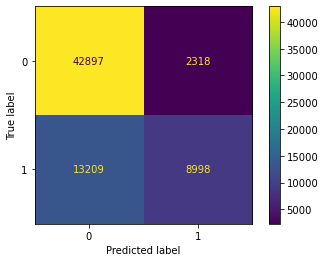

In [26]:
report = classification_report(y_test, logreg_cv.predict(X_test), target_names=['Success', 'Not Success'])

print(report)

plot_confusion_matrix(logreg_cv, X_test, y_test)

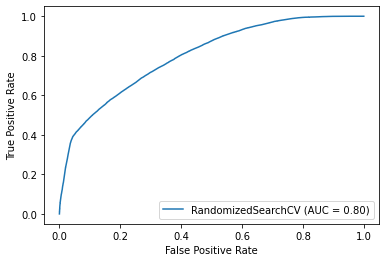

Wall time: 120 ms


In [27]:
%%time

plot_roc_curve(logreg_cv,X_test,y_test)
plt.show()

In [28]:
roc_auc_logreg = roc_auc_score(y_test, logreg_cv.predict_proba(X_test)[:, 1] )
print( "ROC AUC score untuk Logistic Regression: ", roc_auc_logreg)

ROC AUC score untuk Logistic Regression:  0.8009033293301876


### K Nearest Neighbors

Setting parameters for kNN

In [29]:
param_knn = {'n_neighbors': [2], 
              'weights' : ['uniform','distance'], 
              'algorithm': ['auto'], 
              'leaf_size': [30], 
              'p':[2], 
              'metric': ['minkowski'], 
              'metric_params':[None], 
              'n_jobs': [None]
               }

In [30]:
%%time
clf_knn = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

knn_cv = GridSearchCV(clf_knn,
#knn_cv = RandomizedSearchCV(clf_knn,
                     param_grid = param_knn,                      
                     #param_distributions = param_knn,
                      scoring='roc_auc',
                      cv=cv 
                      )
knn_cv.fit(X_train,y_train)

Wall time: 25min 39s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=1),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [30],
                         'metric': ['minkowski'], 'metric_params': [None],
                         'n_jobs': [None], 'n_neighbors': [2], 'p': [2],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [31]:
print("Tuned hyperparameters : {}".format(knn_cv.best_params_))
print("Best ROC_AUC score: {}".format(knn_cv.best_score_))
print("Best Estimator: {}".format(knn_cv.best_estimator_))

Tuned hyperparameters : {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
Best ROC_AUC score: 0.6931360383826141
Best Estimator: KNeighborsClassifier(n_neighbors=2)


              precision    recall  f1-score   support

     Success       0.73      0.91      0.81     45215
 Not Success       0.65      0.32      0.43     22207

    accuracy                           0.72     67422
   macro avg       0.69      0.62      0.62     67422
weighted avg       0.71      0.72      0.69     67422



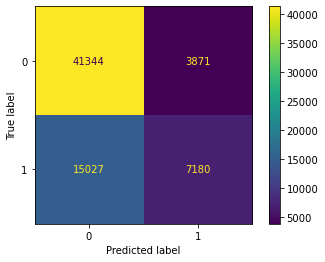

In [32]:
report = classification_report(y_test, knn_cv.predict(X_test), target_names=['Success', 'Not Success'])

print(report)

plot_confusion_matrix(knn_cv, X_test, y_test)

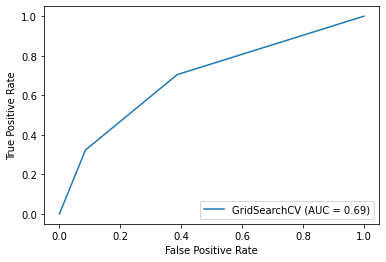

Wall time: 54.5 s


In [33]:
%%time

plot_roc_curve(knn_cv,X_test,y_test)
plt.show()

In [34]:
roc_auc_knn = roc_auc_score(y_test, knn_cv.predict_proba(X_test)[:, 1])
print( "ROC AUC score untuk K Nearest Neighbor: ", roc_auc_knn)

ROC AUC score untuk K Nearest Neighbor:  0.691246617003531


### Decision Tree

Setting parameters for Decision Tree

In [35]:
param_decisiontree = {'criterion':['gini','entropy','log_loss'], 
                   'splitter':['best'], 
                   'max_depth':[None], 
                   'min_samples_split':[2], 
                   'min_samples_leaf':[1], 
                   'min_weight_fraction_leaf':[0.0], 
                   'max_features':[None], 
                   'random_state':[None], 
                   'max_leaf_nodes':[None], 
                   'min_impurity_decrease':[0.0], 
                   'class_weight':[None], 
                   'ccp_alpha':[0.0] 
                   }

In [36]:
%%time
clf_decision = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

decision_cv = RandomizedSearchCV(clf_decision,
                               param_distributions = param_decisiontree,
                               scoring='roc_auc',
                               cv=cv #cross validations
                               )
decision_cv.fit(X_train,y_train)

The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "E:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 333, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)

Wall time: 23 s


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=1),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'ccp_alpha': [0.0],
                                        'class_weight': [None],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None],
                                        'max_features': [None],
                                        'max_leaf_nodes': [None],
                                        'min_impurity_decrease': [0.0],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'min_weight_fraction_leaf': [0.0],
                                        'random_state': [None],
                                        'splitter': ['best']

In [37]:
print("Tuned hyperparameters : {}".format(decision_cv.best_params_))
print("Best ROC_AUC score: {}".format(decision_cv.best_score_))
print("Best Estimator: {}".format(decision_cv.best_estimator_))

Tuned hyperparameters : {'splitter': 'best', 'random_state': None, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': None, 'criterion': 'entropy', 'class_weight': None, 'ccp_alpha': 0.0}
Best ROC_AUC score: 0.7506691422202676
Best Estimator: DecisionTreeClassifier(criterion='entropy')


              precision    recall  f1-score   support

     Success       0.76      0.91      0.83     45215
 Not Success       0.69      0.42      0.52     22207

    accuracy                           0.75     67422
   macro avg       0.73      0.66      0.68     67422
weighted avg       0.74      0.75      0.73     67422



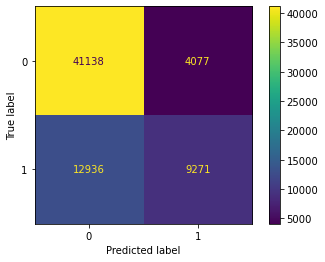

In [38]:
report = classification_report(y_test, decision_cv.predict(X_test), target_names=['Success', 'Not Success'])

print(report)

plot_confusion_matrix(decision_cv, X_test, y_test)

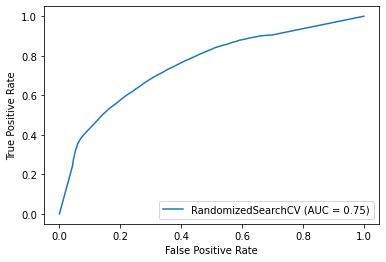

Wall time: 140 ms


In [39]:
%%time

plot_roc_curve(decision_cv,X_test,y_test)
plt.show()

In [40]:
roc_auc_decision = roc_auc_score(y_test, decision_cv.predict_proba(X_test)[:, 1])
print( "ROC AUC score untuk Decision Tree: ", roc_auc_decision)

ROC AUC score untuk Decision Tree:  0.7542224231294998


In [41]:
decision_cv.best_params_

{'splitter': 'best',
 'random_state': None,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'max_leaf_nodes': None,
 'max_features': None,
 'max_depth': None,
 'criterion': 'entropy',
 'class_weight': None,
 'ccp_alpha': 0.0}

In [42]:
clf_decisiontree = DecisionTreeClassifier(splitter= 'best',
 random_state= None,
 min_weight_fraction_leaf= 0.0,
 min_samples_split= 2,
 min_samples_leaf= 1,
 min_impurity_decrease= 0.0,
 max_leaf_nodes= None,
 max_features= None,
 max_depth= None,
 criterion= 'gini',
 class_weight= None,
 ccp_alpha= 0.0)

In [43]:
clf_decisiontree.fit(X_train,y_train)

DecisionTreeClassifier()

### Random forest Tree

Setting parameters for Random Forest

In [44]:
param_randomforest= {'n_estimators':[100],
                   'criterion':['gini'], 
                   'max_depth':[None], 
                   'min_samples_split':[2], 
                   'min_samples_leaf':[1], 
                   'min_weight_fraction_leaf':[0.0], 
                   'max_features':['sqrt'], 
                   'max_leaf_nodes':[None], 
                   'min_impurity_decrease':[0.0], 
                   'bootstrap':[True], 
                   'oob_score':[False], 
                   'n_jobs':[None], 
                   'random_state':[None], 
                   'verbose':[0], 
                   }

In [45]:
%%time
clf_randomforest= RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

randomforest_cv = RandomizedSearchCV(clf_randomforest,
                                    param_distributions = param_randomforest,
                                    scoring='roc_auc',
                                    cv=cv #cross validations
                                    )
randomforest_cv.fit(X_train,y_train)

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.


Wall time: 3min 48s


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=1),
                   estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini'],
                                        'max_depth': [None],
                                        'max_features': ['sqrt'],
                                        'max_leaf_nodes': [None],
                                        'min_impurity_decrease': [0.0],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'min_weight_fraction_leaf': [0.0],
                                        'n_estimators': [100], 'n_jobs': [None],
                                        'oob_score': [False],
                                        'random_state': [None],
                                        'verbose': [0]}

In [46]:
print("Tuned hyperparameters : {}".format(randomforest_cv.best_params_))
print("Best ROC_AUC score: {}".format(randomforest_cv.best_score_))
print("Best Estimator: {}".format(randomforest_cv.best_estimator_))

Tuned hyperparameters : {'verbose': 0, 'random_state': None, 'oob_score': False, 'n_jobs': None, 'n_estimators': 100, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}
Best ROC_AUC score: 0.788314729917013
Best Estimator: RandomForestClassifier(max_features='sqrt')


              precision    recall  f1-score   support

     Success       0.77      0.91      0.83     45215
 Not Success       0.70      0.45      0.55     22207

    accuracy                           0.76     67422
   macro avg       0.74      0.68      0.69     67422
weighted avg       0.75      0.76      0.74     67422



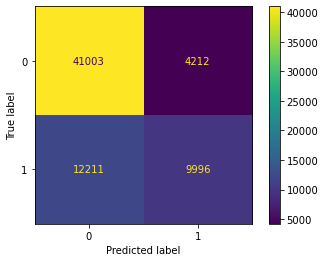

In [47]:
report = classification_report(y_test, randomforest_cv.predict(X_test), target_names=['Success', 'Not Success'])

print(report)

plot_confusion_matrix(randomforest_cv, X_test, y_test)

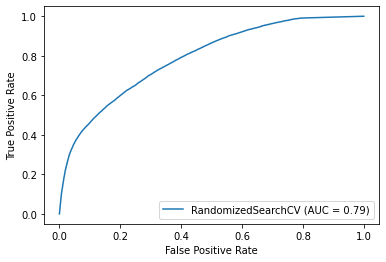

Wall time: 1.57 s


In [48]:
%%time

plot_roc_curve(randomforest_cv,X_test,y_test)
plt.show()

In [49]:
roc_auc_randomforest = roc_auc_score(y_test, randomforest_cv.predict_proba(X_test)[:, 1])
print( "ROC AUC score untuk Random Forest: ", roc_auc_randomforest)

ROC AUC score untuk Random Forest:  0.789996556631672


### Support Vector Machine

Setting parameters for Support Vector Machine

In [50]:
param_svm = {'C':[1], 
             #'C':[1,10,100], 
            #'kernel':['sigmoid','poly','rbf','linear'], 
            'kernel':['rbf'], 
            #'degree':[3], 
            #'gamma':[0.1,0.01,'scale'], 
            'gamma':['scale'], 
            'tol': [0.001],
            'probability': [True] 
            }


In [51]:
df_sample_train = df_train.sample(n=50000)
X_train_svc =  df_sample_train.drop(['success or not'], axis=1)
y_train_svc = df_sample_train['success or not']

In [52]:
%%time
clf_svm= SVC()

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)

svm_cv = RandomizedSearchCV(clf_svm,
                            param_distributions = param_svm,
                            scoring='roc_auc',
                            cv=cv # cross validations
                           )
svm_cv.fit(X_train_svc,y_train_svc)

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.


Wall time: 28min 36s


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=2, random_state=1),
                   estimator=SVC(),
                   param_distributions={'C': [1], 'gamma': ['scale'],
                                        'kernel': ['rbf'],
                                        'probability': [True], 'tol': [0.001]},
                   scoring='roc_auc')

In [53]:
print("Tuned hyperparameters : {}".format(svm_cv.best_params_))
print("Best ROC_AUC score: {}".format(svm_cv.best_score_))
print("Best Estimator: {}".format(svm_cv.best_estimator_))

Tuned hyperparameters : {'tol': 0.001, 'probability': True, 'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Best ROC_AUC score: 0.7728782401901232
Best Estimator: SVC(C=1, probability=True)


              precision    recall  f1-score   support

     Success       0.77      0.96      0.85     45215
 Not Success       0.82      0.40      0.54     22207

    accuracy                           0.77     67422
   macro avg       0.79      0.68      0.70     67422
weighted avg       0.78      0.77      0.75     67422



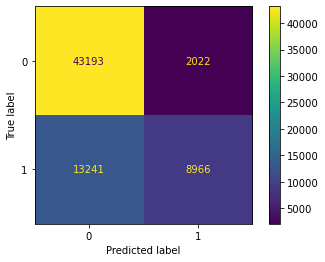

In [54]:
report = classification_report(y_test, svm_cv.predict(X_test), target_names=['Success', 'Not Success'])

print(report)

plot_confusion_matrix(svm_cv, X_test, y_test)

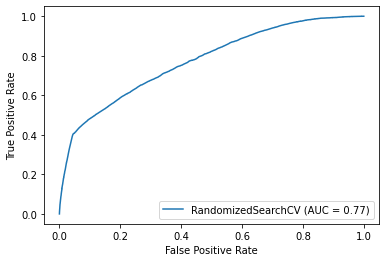

Wall time: 56.3 s


In [55]:
%%time

plot_roc_curve(svm_cv,X_test,y_test)
plt.show()

In [56]:
roc_auc_svm = roc_auc_score(y_test, svm_cv.predict_proba(X_test)[:, 1])
print( "ROC AUC score untuk Support Vector Machine: ", roc_auc_svm)

ROC AUC score untuk Support Vector Machine:  0.7739840757522907


### XGBoost Classifier

Setting parameter

In [57]:
fit_params={"early_stopping_rounds":100,
            "eval_metric":'auc', 
            "eval_set":[(X_test,y_test)],
            "verbose":True
           }

param_dist = {'n_estimators': [k for k in range(300,1000,100)],
              'learning_rate': np.linspace(0.01,0.2,5),
              'subsample': np.linspace(0.1,1,5),
              'max_depth': np.arange(3,10,2),
              'colsample_bytree': np.linspace(0.1,1,10)
             }

In [58]:
model_xgb = xgb.XGBClassifier(objective = 'binary:logistic',use_label_encoder=False)

In [59]:
param_dist

{'n_estimators': [300, 400, 500, 600, 700, 800, 900],
 'learning_rate': array([0.01  , 0.0575, 0.105 , 0.1525, 0.2   ]),
 'subsample': array([0.1  , 0.325, 0.55 , 0.775, 1.   ]),
 'max_depth': array([3, 5, 7, 9]),
 'colsample_bytree': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}

In [60]:
%%time
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)


clf_xgb = RandomizedSearchCV(model_xgb, 
                             param_distributions = param_dist,
                             cv = cv,
                             random_state=42,
                             n_iter = 10,
                             scoring = 'roc_auc', 
                             error_score = 0, 
                             verbose = 5, 
                             n_jobs = -1)

Wall time: 0 ns


In [61]:
%%time
clf_xgb.fit(X_train,y_train,**fit_params)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 25.6min finished
`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-auc:0.75869
[1]	validation_0-auc:0.76599
[2]	validation_0-auc:0.78163
[3]	validation_0-auc:0.78169
[4]	validation_0-auc:0.78711
[5]	validation_0-auc:0.79861
[6]	validation_0-auc:0.79890
[7]	validation_0-auc:0.79884
[8]	validation_0-auc:0.79761
[9]	validation_0-auc:0.79781
[10]	validation_0-auc:0.80305
[11]	validation_0-auc:0.80371
[12]	validation_0-auc:0.80298
[13]	validation_0-auc:0.80362
[14]	validation_0-auc:0.80359
[15]	validation_0-auc:0.80422
[16]	validation_0-auc:0.80379
[17]	validation_0-auc:0.80426
[18]	validation_0-auc:0.80455
[19]	validation_0-auc:0.80507
[20]	validation_0-auc:0.80611
[21]	validation_0-auc:0.80662
[22]	validation_0-auc:0.80776
[23]	validation_0-auc:0.80746
[24]	validation_0-auc:0.80758
[25]	validation_0-auc:0.80764
[26]	validation_0-auc:0.80766
[27]	validation_0-auc:0.80785
[28]	validation_0-auc:0.80868
[29]	validation_0-auc:0.80940
[30]	validation_0-auc:0.80923
[31]	validation_0-auc:0.80938
[32]	validation_0-auc:0.80929
[33]	validation_0-au

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=1),
                   error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importa...
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.1, 0.2, 0.3, 0.4, 0.5, 0

In [62]:
print("Tuned hyperparameters : {}".format(clf_xgb.best_params_))
print("Best ROC_AUC score: {}".format(clf_xgb.best_score_))
print("Best Estimator: {}".format(clf_xgb.best_estimator_))

Tuned hyperparameters : {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.15250000000000002, 'colsample_bytree': 0.8}
Best ROC_AUC score: 0.8158541174920891
Best Estimator: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15250000000000002, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)


              precision    recall  f1-score   support

     Success       0.77      0.94      0.85     45215
 Not Success       0.79      0.42      0.55     22207

    accuracy                           0.77     67422
   macro avg       0.78      0.68      0.70     67422
weighted avg       0.78      0.77      0.75     67422



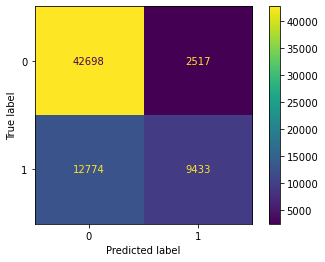

In [63]:
report = classification_report(y_test, clf_xgb.predict(X_test), target_names=['Success', 'Not Success'])

print(report)

plot_confusion_matrix(clf_xgb, X_test, y_test)

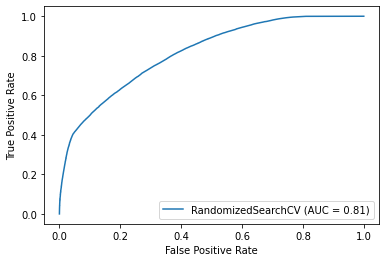

Wall time: 221 ms


In [64]:
%%time

plot_roc_curve(clf_xgb,X_test,y_test)
plt.show()

In [65]:
roc_auc_xgb = roc_auc_score(y_test, clf_xgb.predict_proba(X_test)[:, 1])
print( "ROC AUC score untuk Support Vector Machine: ", roc_auc_xgb)

ROC AUC score untuk Support Vector Machine:  0.8144176325197224


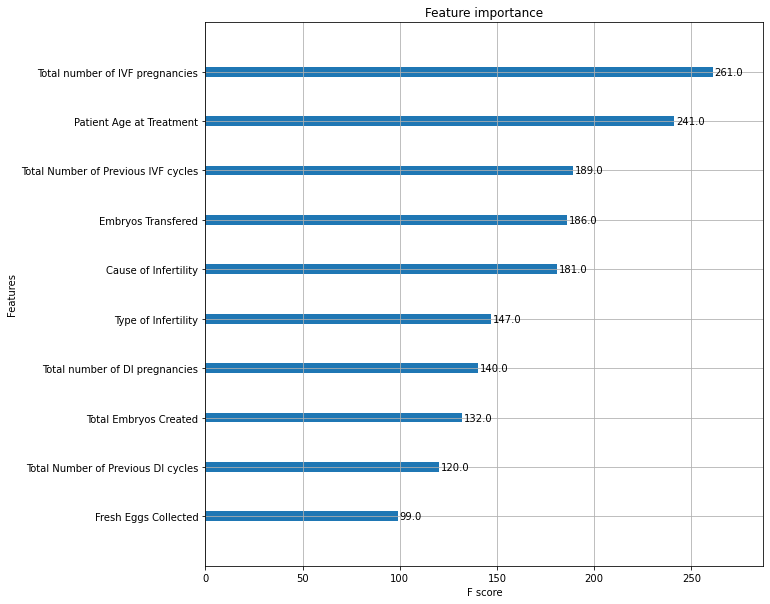

In [66]:
plt.rcParams["figure.figsize"] = (10,10)
xgb.plot_importance(clf_xgb.best_estimator_,max_num_features=10)
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


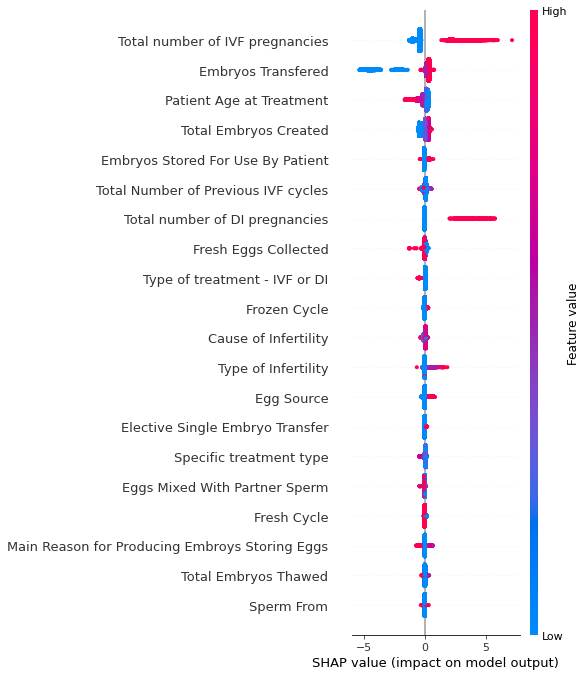

In [67]:
explainer = shap.TreeExplainer(clf_xgb.best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_inds='original')

**PERBANDINGAN SEMUA ROC AUC SCORE TIAP MODEL**
----


In [68]:
Perbandingan_ROC_AUC = pd.DataFrame ({'Logistic Regression': [roc_auc_logreg],
                            'K Nearest Neighbor':[roc_auc_knn],
                            'Decision Tree': [roc_auc_decision],
                            'Random Forest': [roc_auc_randomforest],
                            'Support Vector Machine': [roc_auc_svm],
                            'XGBoost Classifier' : [roc_auc_xgb]
                            }, index=['ROC AUC SCORE'])

Perbandingan_ROC_AUC

,Logistic Regression,K Nearest Neighbor,Decision Tree,Random Forest,Support Vector Machine,XGBoost Classifier
ROC AUC SCORE,0.800903,0.691247,0.754222,0.789997,0.773984,0.814418


Maka model yang akan digunakan adalah **XGBoost Classifier** karena mempunyai nilai ROC AUC Score yang paling tinggi


----------------------------------------------














## Testing to Validation Data

In [69]:
X_valid.dtypes

Patient Age at Treatment                             int64
Total Number of Previous IVF cycles                  int64
Total Number of Previous DI cycles                   int64
Total number of IVF pregnancies                      int64
Total number of DI pregnancies                       int64
Main Reason for Producing Embroys Storing Eggs     float64
Donated embryo                                     float64
Patient acting as Surrogate                        float64
Type of treatment - IVF or DI                        int64
Specific treatment type                            float64
PGD                                                float64
Elective Single Embryo Transfer                    float64
Egg Source                                         float64
Sperm From                                           int64
Fresh Cycle                                        float64
Frozen Cycle                                       float64
Eggs Thawed                                       catego

Transform some categorical data to float as it is already in numerical form (e.g. 0, 1 ,2) so it can fit to xgboost classifier

In [70]:
X_valid_float = X_valid.astype(float)

In [71]:
X_valid_float.dtypes

Patient Age at Treatment                          float64
Total Number of Previous IVF cycles               float64
Total Number of Previous DI cycles                float64
Total number of IVF pregnancies                   float64
Total number of DI pregnancies                    float64
Main Reason for Producing Embroys Storing Eggs    float64
Donated embryo                                    float64
Patient acting as Surrogate                       float64
Type of treatment - IVF or DI                     float64
Specific treatment type                           float64
PGD                                               float64
Elective Single Embryo Transfer                   float64
Egg Source                                        float64
Sperm From                                        float64
Fresh Cycle                                       float64
Frozen Cycle                                      float64
Eggs Thawed                                       float64
Fresh Eggs Col

              precision    recall  f1-score   support

     Success       0.77      0.95      0.85    105841
 Not Success       0.81      0.43      0.56     52678

    accuracy                           0.78    158519
   macro avg       0.79      0.69      0.70    158519
weighted avg       0.78      0.78      0.75    158519



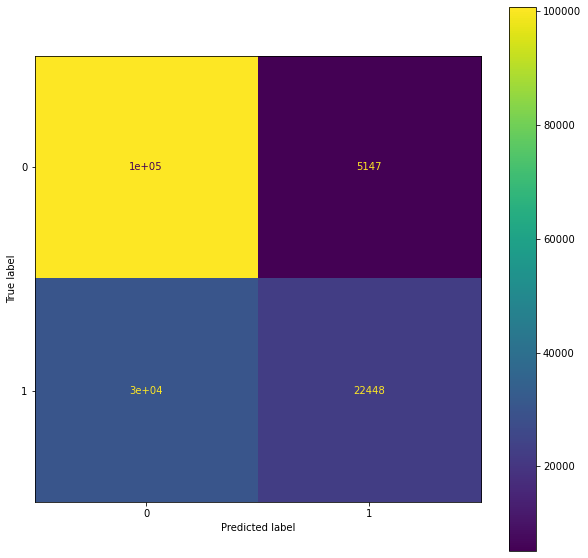

In [72]:
#Testing 
report = classification_report(y_valid, clf_xgb.predict(X_valid_float), target_names=['Success', 'Not Success'])

print(report)

plot_confusion_matrix(clf_xgb, X_valid_float, y_valid)

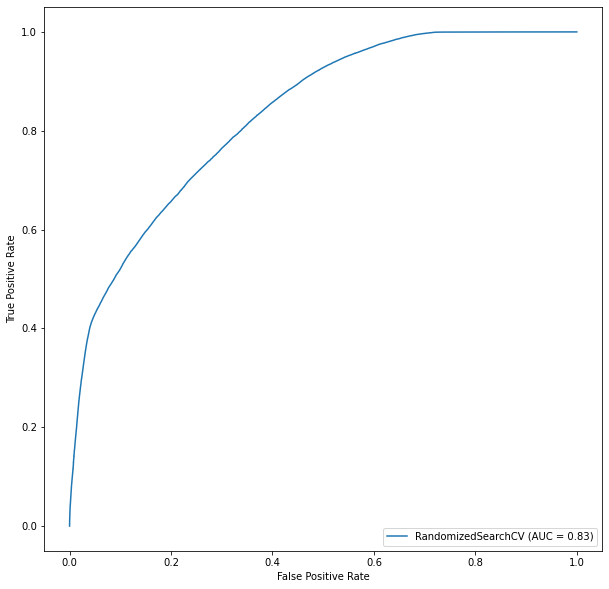

ROC AUC score untuk XGBoost Classifier pada data validation  0.8328283385753202
Wall time: 418 ms


In [73]:
%%time

plot_roc_curve(clf_xgb,X_valid_float,y_valid)
plt.show()

roc_auc_xgboost_valid = roc_auc_score(y_valid, clf_xgb.predict_proba(X_valid_float)[:, 1] )
print( "ROC AUC score untuk XGBoost Classifier pada data validation ", roc_auc_xgboost_valid)

## Saving All Models

In [74]:
import pickle
modellist= [logreg_cv, knn_cv, decision_cv, randomforest_cv, svm_cv, clf_xgb]

In [75]:
#pickle.dump(logreg_cv, open("/content/drive/My Drive/DATA SCIENCE/Project ML & Deployment/ModelSave/logreg_cv.pkl", 'wb'))
#pickle.dump(knn_cv, open("/content/drive/My Drive/DATA SCIENCE/Project ML & Deployment/ModelSave/knn_cv.pkl", 'wb'))
#pickle.dump(decision_cv, open("/content/drive/My Drive/DATA SCIENCE/Project ML & Deployment/ModelSave/decision_cv.pkl", 'wb'))
#pickle.dump(randomforest_cv, open("/content/drive/My Drive/DATA SCIENCE/Project ML & Deployment/ModelSave/randomforest_cv.pkl", 'wb'))
#pickle.dump(svm_cv, open("/content/drive/My Drive/DATA SCIENCE/Project ML & Deployment/ModelSave/svm_cv.pkl", 'wb'))
#pickle.dump(clf_xgb, open("/content/drive/My Drive/DATA SCIENCE/Project ML & Deployment/ModelSave/clf_xgb.pkl", 'wb'))

In [76]:
pickle.dump(logreg_cv, open("F:/DATA SCIENCE/Project ML & Deployment/Modelling/ModelSave/logreg_cv.pkl", 'wb'))
pickle.dump(knn_cv, open("F:/DATA SCIENCE/Project ML & Deployment/Modelling/ModelSave/knn_cv.pkl", 'wb'))
pickle.dump(decision_cv, open("F:/DATA SCIENCE/Project ML & Deployment/Modelling/ModelSave/decision_cv.pkl", 'wb'))
pickle.dump(randomforest_cv, open("F:/DATA SCIENCE/Project ML & Deployment/Modelling/ModelSave/randomforest_cv.pkl", 'wb'))
pickle.dump(svm_cv, open("F:/DATA SCIENCE/Project ML & Deployment/Modelling/ModelSave/svm_cv.pkl", 'wb'))
pickle.dump(clf_xgb, open("F:/DATA SCIENCE/Project ML & Deployment/Modelling/ModelSave/clf_xgb.pkl", 'wb'))

In [77]:
#Testing load model
#loaded_model = pickle.load(open("/content/drive/My Drive/DATA SCIENCE/Project ML & Deployment/ModelSave/knn_cv.pkl", 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)
#print(roc_auc_knn)

In [78]:
#Testing load model
loaded_model = pickle.load(open("F:/DATA SCIENCE/Project ML & Deployment/Modelling/ModelSave/clf_xgb.pkl", 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)
print(roc_auc_xgb)

if result == roc_auc_xgb:
    print("Model is saved and can be recalled")
else:
    print("Model is not saved correctly")

0.8144176325197224
0.8144176325197224
Model is saved and can be recalled


# Serving model

In [79]:
features= X_train.columns.to_list()
features

['Patient Age at Treatment',
 'Total Number of Previous IVF cycles',
 'Total Number of Previous DI cycles',
 'Total number of IVF pregnancies',
 'Total number of DI pregnancies',
 'Main Reason for Producing Embroys Storing Eggs',
 'Donated embryo',
 'Patient acting as Surrogate',
 'Type of treatment - IVF or DI',
 'Specific treatment type',
 'PGD',
 'Elective Single Embryo Transfer',
 'Egg Source',
 'Sperm From',
 'Fresh Cycle',
 'Frozen Cycle',
 'Eggs Thawed',
 'Fresh Eggs Collected',
 'Fresh Eggs Stored',
 'Eggs Mixed With Partner Sperm',
 'Eggs Mixed With Donor sperm',
 'Total Embryos Created',
 'Eggs Micro-injected',
 'Total Embryos Thawed',
 'Embryos Transfered',
 'Embryos Transfered from Eggs Micro-injected',
 'Embryos Stored For Use By Patient',
 'Type of Infertility',
 'Cause of Infertility']

In [80]:
input_data = pd.DataFrame()
for i in features:
  print(i)

  if i =='Total number of IVF pregnancies':
    print("Input Total number (0 to 5)")
  if i =='Total number of DI pregnancies':
    print("Input Total number (0 to 5)")
  if i =='Donated embryo':
    print("Input(0 no or 1 yes)")
  if i =='Patient acting as Surrogate':
    print("Input(0 no or 1 yes)")
  if i =='PGD':
    print("Input(0 no or 1 yes)")
  if i =='Elective Single Embryo Transfer':
    print("Input(0 no or 1 yes)")
  if i =='Fresh Cycle':
    print("Input(0 no or 1 yes)")
  if i =='Frozen Cycle':
    print("Input(0 no or 1 yes)")
  if i =='Eggs Thawed':
    print("Input(0 no or 1 if equal or more than 1)")
  if i =='Eggs Mixed With Donor sperm':
    print("Input(0 no or 1 if equal or more than 1)")
  if i =='Total Embryos Thawed':
    print("Input(0 no, 1 for 1-10 , 2 for >10)")  
  if i =='Embryos Transfered':
    print("Input(0, 1, 2 or 3)")
  if i =='Embryos Transfered from Eggs Micro-injected':
    print("Input(0, 1, 2 or 3)")
 # if i =='Number of foetal sacs with fetal pulsation':
 #   print("Input(0, 1, 2, or 3 for value above 2 )")
  if i =='Type of Infertility':
    print("Input for Type of Infertility - Female Primary: 1, Type of Infertility - Female Secondary: 2, Type of Infertility - Male Primary: 3")
    print("Type of Infertility - Male Secondary:4,Type of Infertility -Couple Primary:5, Type of Infertility -Couple Secondary :6")
  if i =='Cause of Infertility':
    print("'Cause  of Infertility - Tubal disease:1','Cause of Infertility - Ovulatory Disorder:2', 'Cause of Infertility - Male Factor:3'")
    print("'Cause of Infertility - Patient Unexplained:4','Cause of Infertility - Endometriosis :5','Cause of Infertility - Cervical factors :6'")
    print("'Cause of Infertility - Female Factors :7','Cause of Infertility - Partner Sperm Concentration:8','Cause of Infertility -  Partner Sperm Morphology :9'")
    print("'Causes of Infertility - Partner Sperm Motility :10','Cause of Infertility -  Partner Sperm Immunological factors :11'")
  if i =='Patient Age at Treatment':
    print("Input age label, 0 for 18-34, 1 for 35-37, 2 for 38-39, 3 for 40-42, 4 for 43-44, 5 for 45-50, and 6 for above 50 ")
  if i =='Total Number of Previous IVF cycles':
    print("Input 0 to 5, input 6 for above value of 5")
  if i =='Total Number of Previous DI cycles':
    print("Input 0 to 5, input 6 for above value of 5")
  if i =='Main Reason for Producing Embroys Storing Eggs':
    print("Input 'Treatment Now ':0,'For Donation ':1,'Treatment Now ,For Donation ':2,'For Storing Embryos ':3,'For Storing Eggs ':4")
  if i =='Type of treatment - IVF or DI':
    print("Input(1 for IVF or 2 for DI)")
  if i =='Specific treatment type':
    print("Input ('ICI':1, 'IVF':2, 'Unknown':3, 'IUI':4)")
  if i =='Egg Source':
    print("Input(0 for Patient or 1 for Donor)")
  if i =='Sperm From':
    print("Input(0 for Partner, 1 for Donor, 2 for not assigned, and 3 for Partner & Donor)")
  if i =='Fresh Eggs Collected':
    print("Input (0 for '0', 1 for '10-20', 2 for '1-10', 3 for '20-50', 4 for '>50')")      
  if i =='Fresh Eggs Stored':
    print("Input(0 for '0', 1 for '1-50' and 2 for >50)")
  if i =='Eggs Mixed With Partner Sperm':
    print("Input (0 for '0', 1 for '1-10', 2 for '10-20', 3 for '20-50', 4 for '>50')") 
  if i =='Total Embryos Created':
    print("Input (0 for '0', 1 for '1-5', 2 for '5-10', 3 for '10-20', 4 for '>20')") 
  if i =='Eggs Micro-injected':
    print("Input (0 for '0', 1 for '1-10', 2 for '10-20', 3 for '20-50', 4 for '>50')") 
  if i =='Embryos Stored For Use By Patient':
    print("Input (0 for '0', 1 for '1-10', 2 for '10-50', 3 for '>50')") 
 # if i =='Early Outcome':
 #   print("Input('Intrauterine Fetal Pulsation Seen ': 1, 'None ':0, 'Biochemical Pregnancy Only ': 2, 'Misscarriage ': 3 ,'Ectopic ':4 )") 

  number = float(input("Enter your value: "))
  
  if number < 0 :
    print("Please input non-negative value ")
    break
  else:
    pass
  x=' '
  print(x)
  column_name = i
  #input_data.insert(loc=0, column= i, value=[number])
  input_data.loc[0, column_name] = number

Patient Age at Treatment
Input age label, 0 for 18-34, 1 for 35-37, 2 for 38-39, 3 for 40-42, 4 for 43-44, 5 for 45-50, and 6 for above 50 


Enter your value:  0


 
Total Number of Previous IVF cycles
Input 0 to 5, input 6 for above value of 5


Enter your value:  1


 
Total Number of Previous DI cycles
Input 0 to 5, input 6 for above value of 5


Enter your value:  2


 
Total number of IVF pregnancies
Input Total number (0 to 5)


Enter your value:  2


 
Total number of DI pregnancies
Input Total number (0 to 5)


Enter your value:  0


 
Main Reason for Producing Embroys Storing Eggs
Input 'Treatment Now ':0,'For Donation ':1,'Treatment Now ,For Donation ':2,'For Storing Embryos ':3,'For Storing Eggs ':4


Enter your value:  0


 
Donated embryo
Input(0 no or 1 yes)


Enter your value:  0


 
Patient acting as Surrogate
Input(0 no or 1 yes)


Enter your value:  0


 
Type of treatment - IVF or DI
Input(1 for IVF or 2 for DI)


Enter your value:  1


 
Specific treatment type
Input ('ICI':1, 'IVF':2, 'Unknown':3, 'IUI':4)


Enter your value:  2


 
PGD
Input(0 no or 1 yes)


Enter your value:  1


 
Elective Single Embryo Transfer
Input(0 no or 1 yes)


Enter your value:  1


 
Egg Source
Input(0 for Patient or 1 for Donor)


Enter your value:  0


 
Sperm From
Input(0 for Partner, 1 for Donor, 2 for not assigned, and 3 for Partner & Donor)


Enter your value:  0


 
Fresh Cycle
Input(0 no or 1 yes)


Enter your value:  1


 
Frozen Cycle
Input(0 no or 1 yes)


Enter your value:  0


 
Eggs Thawed
Input(0 no or 1 if equal or more than 1)


Enter your value:  0


 
Fresh Eggs Collected
Input (0 for '0', 1 for '10-20', 2 for '1-10', 3 for '20-50', 4 for '>50')


Enter your value:  1


 
Fresh Eggs Stored
Input(0 for '0', 1 for '1-50' and 2 for >50)


Enter your value:  1


 
Eggs Mixed With Partner Sperm
Input (0 for '0', 1 for '1-10', 2 for '10-20', 3 for '20-50', 4 for '>50')


Enter your value:  1


 
Eggs Mixed With Donor sperm
Input(0 no or 1 if equal or more than 1)


Enter your value:  0


 
Total Embryos Created
Input (0 for '0', 1 for '1-5', 2 for '5-10', 3 for '10-20', 4 for '>20')


Enter your value:  1


 
Eggs Micro-injected
Input (0 for '0', 1 for '1-10', 2 for '10-20', 3 for '20-50', 4 for '>50')


Enter your value:  0


 
Total Embryos Thawed
Input(0 no, 1 for 1-10 , 2 for >10)


Enter your value:  1


 
Embryos Transfered
Input(0, 1, 2 or 3)


Enter your value:  0


 
Embryos Transfered from Eggs Micro-injected
Input(0, 1, 2 or 3)


Enter your value:  0


 
Embryos Stored For Use By Patient
Input (0 for '0', 1 for '1-10', 2 for '10-50', 3 for '>50')


Enter your value:  1


 
Type of Infertility
Input for Type of Infertility - Female Primary: 1, Type of Infertility - Female Secondary: 2, Type of Infertility - Male Primary: 3
Type of Infertility - Male Secondary:4,Type of Infertility -Couple Primary:5, Type of Infertility -Couple Secondary :6


Enter your value:  3


 
Cause of Infertility
'Cause  of Infertility - Tubal disease:1','Cause of Infertility - Ovulatory Disorder:2', 'Cause of Infertility - Male Factor:3'
'Cause of Infertility - Patient Unexplained:4','Cause of Infertility - Endometriosis :5','Cause of Infertility - Cervical factors :6'
'Cause of Infertility - Female Factors :7','Cause of Infertility - Partner Sperm Concentration:8','Cause of Infertility -  Partner Sperm Morphology :9'
'Causes of Infertility - Partner Sperm Motility :10','Cause of Infertility -  Partner Sperm Immunological factors :11'


Enter your value:  4


In [81]:
input_data

,Patient Age at Treatment,Total Number of Previous IVF cycles,Total Number of Previous DI cycles,Total number of IVF pregnancies,Total number of DI pregnancies,Main Reason for Producing Embroys Storing Eggs,Donated embryo,Patient acting as Surrogate,Type of treatment - IVF or DI,Specific treatment type,...,Eggs Mixed With Partner Sperm,Eggs Mixed With Donor sperm,Total Embryos Created,Eggs Micro-injected,Total Embryos Thawed,Embryos Transfered,Embryos Transfered from Eggs Micro-injected,Embryos Stored For Use By Patient,Type of Infertility,Cause of Infertility
0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,4.0


In [82]:
input_data = input_data.transpose().reindex(features).transpose()

In [83]:
input_data.columns

Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles', 'Total number of IVF pregnancies',
       'Total number of DI pregnancies',
       'Main Reason for Producing Embroys Storing Eggs', 'Donated embryo',
       'Patient acting as Surrogate', 'Type of treatment - IVF or DI',
       'Specific treatment type', 'PGD', 'Elective Single Embryo Transfer',
       'Egg Source', 'Sperm From', 'Fresh Cycle', 'Frozen Cycle',
       'Eggs Thawed', 'Fresh Eggs Collected', 'Fresh Eggs Stored',
       'Eggs Mixed With Partner Sperm', 'Eggs Mixed With Donor sperm',
       'Total Embryos Created', 'Eggs Micro-injected', 'Total Embryos Thawed',
       'Embryos Transfered', 'Embryos Transfered from Eggs Micro-injected',
       'Embryos Stored For Use By Patient', 'Type of Infertility',
       'Cause of Infertility'],
      dtype='object')

### Prediction

In [84]:
#Prediction:
result_prediction= clf_xgb.predict(input_data)
if result_prediction == 1: 
  print("Hasil prediksi berdasarkan kondisi anda: Berhasil" )
else:
  print("Hasil prediksi berdasarkan kondisi anda: Tidak Berhasil")


Hasil prediksi berdasarkan kondisi anda: Berhasil
